In [1]:
import numpy as np
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torch.optim import optimizer

import matplotlib.pyplot as plt
pd.options.display.max_columns = None
pd.options.display.max_rows = 50
pd.options.display.min_rows = 20

%matplotlib notebook

In [2]:
crop_yield_data = pd.read_csv('yield_forecasting_database_0718.csv', parse_dates=['Date', ], dayfirst=True)
crop_yield_data = crop_yield_data.sort_values('Date')

In [6]:
crop_yield_data.sort_values(['Block_name', 'Date'])

,Unnamed: 0,Vineyard_name,Block_name,Season,Date,Variety,NDVImean,NDVIsum,NDWImean,NDWIsum,NDVIRemean,NDVIResum,TCARImean,TCARIsum,SIPImean,SIPIsum,RRENDVImean,RRENDVIsum,RN2NDVImean,RN2NDVIsum,GNDVImean,GNDVIsum,MSRmean,MSRsum,RVImean,RVIsum,N2NDVImean,N2NDVIsum,RENDVI1mean,RENDVI1sum,RENDVI2mean,RENDVI2sum,RDVI1mean,RDVI1sum,RDVI2mean,RDVI2sum,TDVImean,TDVIsum,TDVI2mean,TDVI2sum,NLImean,NLIsum,LAIGmean,LAIGsum,SMmean,SMsum,GDD,Rainfall,Yield,Size,Ha,SizeClass,TimeTo,BlockAverage,VineyardVarietyAverage,HeatShock,FrostShock,MaxSize,PC1,PC2,Cabernet Sauvignon,Chardonnay,Marzemino,Merlot,Pinot Gris,Pinot Noir,Rare Red,Rare White,Riesling,Sauvignon Blanc,Sauvignon Gris,Syrah,YieldPerHec,YieldScale,High yield,Low yield,variety_idx,New_Longitude,New_Latitude,YieldGaussian
4370,4370,M98,B10KTFF,2017,2016-12-15,Sauvignon Blanc,0.811700,1074.690758,0.331713,439.188016,0.457708,606.005194,0.168183,222.673953,0.819473,1084.981862,0.704485,932.737600,0.447245,592.151948,0.714700,946.262832,2.749660,3640.549489,10.455138,13842.602150,0.812131,1075.260971,0.572718,758.278980,0.573042,758.707759,0.524448,694.369322,0.812131,1075.260971,0.615258,814.602192,0.615669,815.145891,0.569070,753.448871,2.983293,3949.879436,0.448688,594.063395,342.0,435.6,96.16,1324,1316,XLarge,137,155.116,78.268693,-1,-1,1324,1032.517645,-19.974448,0,0,0,0,0,0,0,0,0,1,0,0,0.073070,High yield,1,0,5,6.931706,45.923595,0.257480
4400,4400,M98,B10KTFF,2017,2016-12-25,Sauvignon Blanc,0.837518,1108.874114,0.386364,511.545982,0.517054,684.580097,0.171439,226.985791,0.854430,1131.265839,0.718419,951.186407,0.448559,593.891800,0.736751,975.458228,3.070323,4065.107276,12.444787,16476.897410,0.842142,1114.996153,0.576388,763.138303,0.586163,776.079515,0.530662,702.597066,0.842142,1114.996153,0.616686,816.492143,0.632846,837.888510,0.613142,811.800197,3.054210,4043.773780,0.646234,855.613610,392.5,449.6,96.16,1324,1316,XLarge,127,155.116,78.268693,-1,-1,1324,1083.338225,-13.169851,0,0,0,0,0,0,0,0,0,1,0,0,0.073070,High yield,1,0,5,6.931706,45.923595,0.204942
4460,4460,M98,B10KTFF,2017,2017-02-03,Sauvignon Blanc,0.613476,812.242770,0.187792,248.636846,0.203116,268.925302,0.085954,113.802481,0.646810,856.375816,0.559073,740.212054,0.371456,491.807638,0.591871,783.637394,1.418562,1878.175637,4.296047,5687.966017,0.626226,829.122779,0.471467,624.221724,0.487371,645.279303,0.350290,463.783780,0.626226,829.122779,0.377472,499.773528,0.396440,524.886070,0.052602,69.645577,2.520241,3336.798633,0.576084,762.735437,621.0,572.0,96.16,1324,1316,XLarge,87,155.116,78.268693,-1,-1,1324,736.227200,-5.997658,0,0,0,0,0,0,0,0,0,1,0,0,0.073070,High yield,1,0,5,6.931706,45.923595,-1.546562
4385,4385,M98,B10KTFF,2017,2017-02-10,Sauvignon Blanc,0.732510,969.842643,0.185281,245.311654,0.368135,487.411155,0.138779,183.743465,0.783477,1037.323669,0.635679,841.638744,0.409832,542.617964,0.711485,942.006424,2.051421,2716.081596,6.791322,8991.710055,0.745746,987.367934,0.504274,667.658740,0.525465,695.715284,0.434872,575.770985,0.745746,987.367934,0.484050,640.882382,0.513408,679.752708,0.333236,441.205115,2.726137,3609.405112,0.358894,475.175355,660.0,578.9,96.16,1324,1316,XLarge,80,155.116,78.268693,-1,-1,1324,978.431643,22.602426,0,0,0,0,0,0,0,0,0,1,0,0,0.073070,High yield,1,0,5,6.931706,45.923595,1.541757
4475,4475,M98,B10KTFF,2017,2017-02-13,Sauvignon Blanc,0.706610,935.551199,0.157876,209.027696,0.321557,425.741621,0.102021,135.075230,0.746322,988.129675,0.622675,824.421731,0.399382,528.781838,0.697258,923.169789,1.906855,2524.675655,6.208494,8220.046004,0.722660,956.801611,0.505046,668.680837,0.528952,700.332806,0.381008,504.455130,0.722660,956.801611,0.396653,525.168195,0.425854,563.830821,0.192728,255.171277,2.744987,3634.362818,0.545897,722.767619,680.0,579.7,96.16,1324,1316,XLarge,77,155.116,78.268693,-1,-1,1324,927.495641,31.827417,0,0,0,0,0,0,0,0,0,1,0,0,0.073070,High yield,1,0,5,6.931706,45.923595,0.320263
4355,4355,M98,B10KTFF,2017,2017-02-20,Sauvignon Blanc,0.777664,1029.627207,0.214401,283.

In [8]:
crop_yield_data.keys()

Index(['Unnamed: 0', 'Vineyard_name', 'Block_name', 'Season', 'Date',
       'Variety', 'NDVImean', 'NDVIsum', 'NDWImean', 'NDWIsum', 'NDVIRemean',
       'NDVIResum', 'TCARImean', 'TCARIsum', 'SIPImean', 'SIPIsum',
       'RRENDVImean', 'RRENDVIsum', 'RN2NDVImean', 'RN2NDVIsum', 'GNDVImean',
       'GNDVIsum', 'MSRmean', 'MSRsum', 'RVImean', 'RVIsum', 'N2NDVImean',
       'N2NDVIsum', 'RENDVI1mean', 'RENDVI1sum', 'RENDVI2mean', 'RENDVI2sum',
       'RDVI1mean', 'RDVI1sum', 'RDVI2mean', 'RDVI2sum', 'TDVImean', 'TDVIsum',
       'TDVI2mean', 'TDVI2sum', 'NLImean', 'NLIsum', 'LAIGmean', 'LAIGsum',
       'SMmean', 'SMsum', 'GDD', 'Rainfall', 'Yield', 'Size', 'Ha',
       'SizeClass', 'TimeTo', 'BlockAverage', 'VineyardVarietyAverage',
       'HeatShock', 'FrostShock', 'MaxSize', 'PC1', 'PC2',
       'Cabernet Sauvignon', 'Chardonnay', 'Marzemino', 'Merlot', 'Pinot Gris',
       'Pinot Noir', 'Rare Red', 'Rare White', 'Riesling', 'Sauvignon Blanc',
       'Sauvignon Gris', 'Syrah', 'Yield

In [51]:
from scipy.stats import norm
def gaussianize(data):
    n = data.shape[0]
    indices = np.argsort(data)
    qs = norm.ppf(np.linspace(1/n, 1 - 1/n, n))
    return qs[indices]

crop_yield_data['YieldGaussian'] = gaussianize(crop_yield_data.Yield.to_numpy())
crop_yield_data['YieldPerHecGaussian'] = gaussianize(crop_yield_data.YieldPerHec.to_numpy())

    

<IPython.core.display.Javascript object>


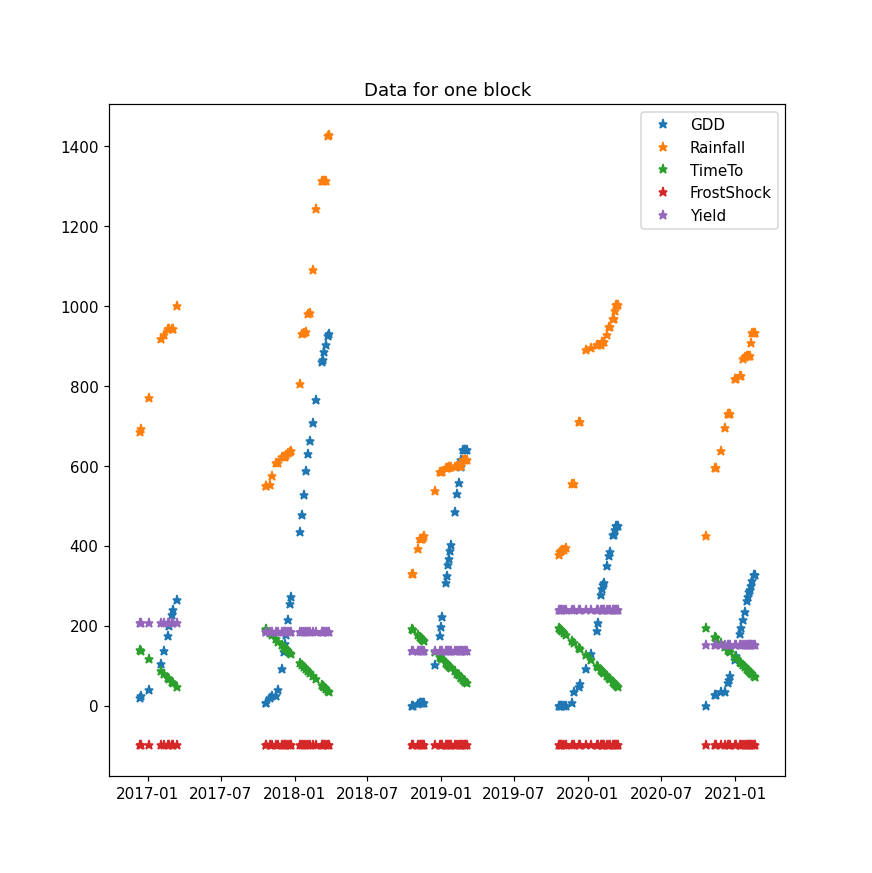

Text(0.5, 1.0, 'Data for one block')

In [16]:
%matplotlib notebook

data_block = crop_yield_data[crop_yield_data.Block_name == 'QB7WVWW'].sort_values('Date')

plt.figure(figsize=(8, 8))
plt.plot(data_block.Date.to_numpy(), data_block.GDD.to_numpy(), '*', label='GDD')
plt.plot(data_block.Date.to_numpy(), data_block.Rainfall.to_numpy(),  '*', label='Rainfall')


plt.plot(data_block.Date.to_numpy(), data_block.TimeTo.to_numpy(),  '*', label='TimeTo')
#plt.plot(data_block.Date.to_numpy(), data_block.NDWIsum.to_numpy(),  '*', label='NDWIsum')
plt.plot(data_block.Date.to_numpy(), data_block.FrostShock.to_numpy() * 100, '*', label='FrostShock')

plt.plot(data_block.Date.to_numpy(), data_block.Yield.to_numpy() * 10,  '*', label='Yield')

plt.legend()
plt.title('Data for one block')

## Cumulative quantities 

We define cumulative quantities over the season

In [18]:
def add_cumulative(data: pd.DataFrame, feature_name: str):
    cumulative_feature = crop_yield_data.groupby(['Season', 'Block_name'])[feature_name].cumsum()
    data['cml_' + feature_name] = cumulative_feature



In [19]:
cumulative_features = [
        'NDVImean', 'NDVIsum', 'NDWImean', 'NDWIsum', 'NDVIRemean',
       'NDVIResum', 'TCARImean', 'TCARIsum', 'SIPImean', 'SIPIsum',
       'RRENDVImean', 'RRENDVIsum', 'RN2NDVImean', 'RN2NDVIsum', 'GNDVImean',
       'GNDVIsum', 'MSRmean', 'MSRsum', 'RVImean', 'RVIsum', 'N2NDVImean',
       'N2NDVIsum', 'RENDVI1mean', 'RENDVI1sum', 'RENDVI2mean', 'RENDVI2sum',
       'RDVI1mean', 'RDVI1sum', 'RDVI2mean', 'RDVI2sum', 'TDVImean', 'TDVIsum',
       'TDVI2mean', 'TDVI2sum', 'NLImean', 'NLIsum', 'LAIGmean', 'LAIGsum',
       'SMmean', 'SMsum', 
        #'GDD', 'Rainfall'
]

for feature in cumulative_features:
    add_cumulative(crop_yield_data, feature)

## Basic model 

In [70]:
N_EPOCHS = 100
BATCH_SIZE = 128
DEVICE = 'cuda:0'

In [96]:
feature_names = ['GDD', 'Rainfall', 'High yield',
                 'TimeTo', 
                 'FrostShock', 'HeatShock',
                'MaxSize',
                'NDVImean', 'NDVIsum', 'NDWImean', 'NDWIsum', 'NDVIRemean',
               'NDVIResum', 'TCARImean', 'TCARIsum', 'SIPImean', 'SIPIsum',
               'RRENDVImean', 'RRENDVIsum', 'RN2NDVImean', 'RN2NDVIsum', 'GNDVImean',
               'GNDVIsum', 'MSRmean', 'MSRsum', 'RVImean', 'RVIsum', 'N2NDVImean',
               'N2NDVIsum', 'RENDVI1mean', 'RENDVI1sum', 'RENDVI2mean', 'RENDVI2sum',
               'RDVI1mean', 'RDVI1sum', 'RDVI2mean', 'RDVI2sum', 'TDVImean', 'TDVIsum',
               'TDVI2mean', 'TDVI2sum', 'NLImean', 'NLIsum', 'LAIGmean', 'LAIGsum',
               'SMmean', 'SMsum',
                'Cabernet Sauvignon', 'Chardonnay', 'Marzemino', 'Merlot', 'Pinot Gris',
                'Pinot Noir', 'Rare Red', 'Riesling', 'Sauvignon Blanc', 'Sauvignon Gris',
                'Syrah',
                 'PC1', 'PC2'
                ]


#feature_names.extend(['_'.join(('cml', f_name)) for f_name in cumulative_features])
print(feature_names)

['GDD', 'Rainfall', 'High yield', 'TimeTo', 'FrostShock', 'HeatShock', 'MaxSize', 'NDVImean', 'NDVIsum', 'NDWImean', 'NDWIsum', 'NDVIRemean', 'NDVIResum', 'TCARImean', 'TCARIsum', 'SIPImean', 'SIPIsum', 'RRENDVImean', 'RRENDVIsum', 'RN2NDVImean', 'RN2NDVIsum', 'GNDVImean', 'GNDVIsum', 'MSRmean', 'MSRsum', 'RVImean', 'RVIsum', 'N2NDVImean', 'N2NDVIsum', 'RENDVI1mean', 'RENDVI1sum', 'RENDVI2mean', 'RENDVI2sum', 'RDVI1mean', 'RDVI1sum', 'RDVI2mean', 'RDVI2sum', 'TDVImean', 'TDVIsum', 'TDVI2mean', 'TDVI2sum', 'NLImean', 'NLIsum', 'LAIGmean', 'LAIGsum', 'SMmean', 'SMsum', 'Cabernet Sauvignon', 'Chardonnay', 'Marzemino', 'Merlot', 'Pinot Gris', 'Pinot Noir', 'Rare Red', 'Riesling', 'Sauvignon Blanc', 'Sauvignon Gris', 'Syrah', 'PC1', 'PC2']


Here we prepare the data. The features will be provided to the neural network as tensors of shape (n_batch, l_seq, n_features), while the targets will have shape (n_batch, l_seq). As some sequences might differ in length, the target is set to None for 'missing' data. When computing the loss over a batch, we ignore those values. 

In [97]:
crop_yield_data['YieldPerHec_n'] = (crop_yield_data.YieldPerHec - crop_yield_data.YieldPerHec.mean()) / crop_yield_data.YieldPerHec.std()

In [98]:
crop_yield_data['YieldPerHec_log'] = np.log(crop_yield_data.YieldPerHec)
crop_yield_data['YieldPerHec_log_n'] = (crop_yield_data.YieldPerHec_log - crop_yield_data.YieldPerHec_log.mean()) / crop_yield_data.YieldPerHec_log.std()

In [109]:
from typing import List
from datetime import datetime
from torch.nn import Sequential, Linear, ReLU, BatchNorm1d
from tukey.losses import TuckeyGandHloss
from tukey.models import RNN, NN
from torch.nn import Module
from torch.utils.data import IterableDataset
from torch.nn.utils.rnn import pad_sequence


class RNNDataset(IterableDataset):
    def __init__(self, pd_data: pd.DataFrame, feature_names: List[str],
                target_name: str, log_target: bool = True,
                mean_features: float = None, std_features: float = None):
        self.pd_data = pd_data
        self.groups = pd_data.groupby(['Block_name', 'Season'])
        self.feature_names = feature_names
        self.target_name = target_name
        self.log_target = log_target
        if mean_features is None:
            self.mean_std = self._compute_mean_str()
        else:
            self.mean_std = (mean_features, std_features)

    def __iter__(self):
        for data in (self.groups.get_group(x) for x in self.groups.groups):
            features_torch = torch.from_numpy(data[self.feature_names].to_numpy()).to(dtype=torch.float32)
            targets_torch = torch.from_numpy(data[self.target_name].to_numpy()).to(dtype=torch.float32)
            if self.log_target:
                targets_torch = torch.log(targets_torch)
            features_torch = (features_torch - self.mean_std[0]) / self.mean_std[1]
            yield features_torch.to(device=DEVICE), targets_torch.to(device=DEVICE)

    def _compute_mean_str(self):
        features_np = self.pd_data[feature_names].to_numpy()
        return np.mean(features_np), np.std(features_np)

def collate_fn(data):
    """
    Functions used to collate several sequences of varying length
    into a batch by padding shorter sequences.
    """
    a, b = [x[0] for x in data], [x[1] for x in data]
    return (pad_sequence(a, batch_first=True, padding_value=0.),
            pad_sequence(b, batch_first=True, padding_value=0.))


class NN(Sequential):
    def __init__(self, structure: list, n_out: int):
        subblocks = []
        self.n_out = n_out
        for i in range(len(structure) - 1):
            subblocks.extend(self._make_sublock(structure[i], structure[i + 1]))
        subblocks.extend(self._make_final_layer(structure[-1]))
        super().__init__(*subblocks)

    def _make_sublock(self, n_in: int, n_out: int):
        return [Linear(n_in, n_out), ReLU()]#, BatchNorm1d(n_out)]

    def _make_final_layer(self, n_in : int):
        return [Linear(n_in, self.n_out), ]

    
class RNN(Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size

        self.i2h = NN((input_size + hidden_size, 256, 256, 256, 256), hidden_size)
        self.i2o = NN((input_size + hidden_size, 256, 256, 256, 256), output_size)

    def forward(self, input: torch.Tensor, hidden):
        assert input.ndim == 2
        assert hidden.ndim == 2
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        return output, hidden

    def initHidden(self, batch_size=BATCH_SIZE):
        return torch.zeros(batch_size, self.hidden_size).to(device=DEVICE)



def train_for_one_epoch(nn, loss, optimizer, scheduler, train_dl: DataLoader, val_dl: DataLoader,
                       batch_size=BATCH_SIZE):
    nn.train()
    losses = []
    for i, (x, y) in enumerate(train_dl):
        print(f'Sequence {i}')
        hidden = nn.initHidden(batch_size)
        loss_y_yhat = 0
        for a in range(x.shape[1]):
            # [i_batch, i_seq, i_feature] for input, [i_batch, i_value for target]
            xx = x[:, a, :]
            yy = y[:, a: a + 1]
            sel = yy[:, 0] == 0.
            y_hat, hidden = nn(xx, hidden)
            loss_y_yhat = loss(y_hat[~sel, ...], yy[~sel, ...])
            losses.append(loss_y_yhat.detach().item())
            loss_y_yhat.backward(retain_graph=True)
        optimizer.step()
        optimizer.zero_grad()
        print('Current loss: ', loss_y_yhat.detach().item())
    scheduler.step()
    train_loss = np.mean(losses)
    
    losses = []
    with torch.no_grad():
        for i, (x, y) in enumerate(train_dl):
            hidden = nn.initHidden(batch_size)
            loss_y_yhat = 0
            for a in range(x.shape[1]):
                # [i_batch, i_seq, i_feature] for input, [i_batch, i_value for target]
                xx = x[:, a, :]
                yy = y[:, a: a + 1]
                sel = yy[:, 0] == 0.
                y_hat, hidden = nn(xx, hidden)
                loss_y_yhat = loss(y_hat[~sel, ...], yy[~sel, ...])
                losses.append(loss_y_yhat.detach().item())
    test_loss = np.mean(losses)
    
    print('Train losses: ', train_loss, ', Validation loss: ', test_loss)

In [110]:
train = crop_yield_data[crop_yield_data.Season < 2020]
test = crop_yield_data[crop_yield_data.Season == 2020]

train_ds = RNNDataset(train, feature_names=feature_names, target_name='YieldPerHec_log_n', log_target=False)
test_ds = RNNDataset(test, feature_names=feature_names, target_name='YieldPerHec_log_n', log_target=False,
                    mean_features=train_ds.mean_std[0], std_features=train_ds.mean_std[1])

train_dl = DataLoader(train_ds, collate_fn=collate_fn, batch_size=BATCH_SIZE, drop_last=True)
test_dl = DataLoader(test_ds, collate_fn=collate_fn, batch_size=BATCH_SIZE, drop_last=True)

In [111]:
from torch.optim import Adam, SGD
nn = RNN(len(feature_names), 512, 4)

In [112]:
from torch.optim.lr_scheduler import StepLR, CyclicLR
optimizer = Adam(nn.parameters(), lr=1e-3)
scheduler = StepLR(optimizer, step_size=25)

Sequence 0
Current loss:  0.9369295239448547
Sequence 1
Current loss:  0.519082248210907
Sequence 2
Current loss:  0.6503322124481201
Sequence 3
Current loss:  0.5033590197563171
Sequence 4
Current loss:  0.4511711597442627
Sequence 5
Current loss:  0.450201153755188
Sequence 6
Current loss:  0.31777745485305786
Sequence 7
Current loss:  0.7225943207740784
Sequence 8
Current loss:  -0.06291797757148743
Sequence 9
Current loss:  0.25585293769836426
Sequence 10
Current loss:  0.639037549495697
Sequence 0
Sequence 1
Sequence 2
Sequence 3
Sequence 4
Sequence 5
Sequence 6
Sequence 7
Sequence 8
Sequence 9
Sequence 10
Train losses:  0.7905447396411471 , Validation loss:  0.5622548833247019
torch.Size([26638, 4]) torch.Size([26638, 1])


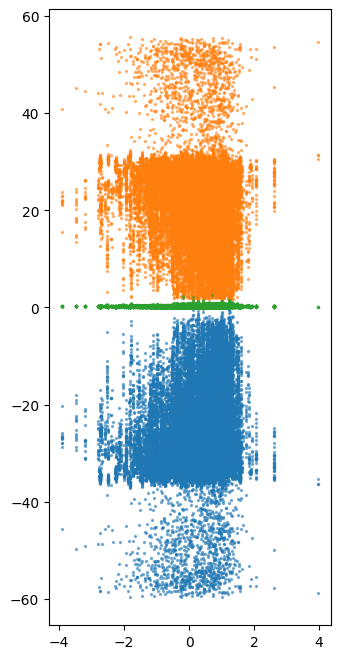

Sequence 0
Current loss:  -0.12750589847564697
Sequence 1
Current loss:  -0.32222214341163635
Sequence 2
Current loss:  -0.300663024187088
Sequence 3
Current loss:  -0.5323152542114258
Sequence 4
Current loss:  -0.6468201875686646
Sequence 5
Current loss:  -0.8379442095756531
Sequence 6
Current loss:  -0.19315490126609802
Sequence 7
Current loss:  0.4388880133628845
Sequence 8
Current loss:  -0.4216881990432739
Sequence 9
Current loss:  -0.34477338194847107
Sequence 10
Current loss:  0.1271907091140747
Sequence 0
Sequence 1
Sequence 2
Sequence 3
Sequence 4
Sequence 5
Sequence 6
Sequence 7
Sequence 8
Sequence 9
Sequence 10
Train losses:  0.4108246652128762 , Validation loss:  0.36869241696693106
torch.Size([26638, 4]) torch.Size([26638, 1])


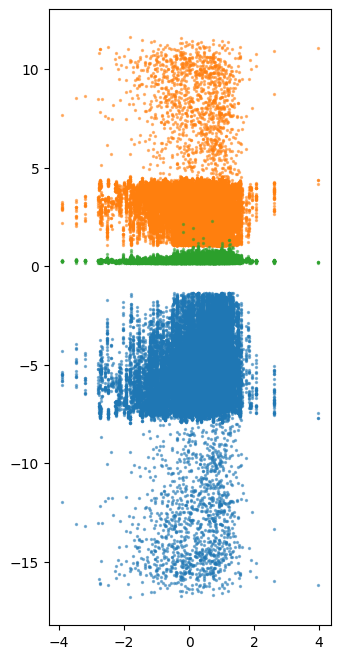

Sequence 0
Current loss:  -0.6638590097427368
Sequence 1
Current loss:  -0.5633593201637268
Sequence 2
Current loss:  -0.24526484310626984
Sequence 3
Current loss:  -0.6333391666412354
Sequence 4
Current loss:  0.20521825551986694
Sequence 5
Current loss:  -0.017434686422348022
Sequence 6
Current loss:  -0.292157381772995
Sequence 7
Current loss:  0.09804412722587585
Sequence 8
Current loss:  -0.5015343427658081
Sequence 9
Current loss:  -0.5318241119384766
Sequence 10
Current loss:  -0.6902982592582703
Sequence 0
Sequence 1
Sequence 2
Sequence 3
Sequence 4
Sequence 5
Sequence 6
Sequence 7
Sequence 8
Sequence 9
Sequence 10
Train losses:  0.3261586014328489 , Validation loss:  0.267187411787167
torch.Size([26638, 4]) torch.Size([26638, 1])


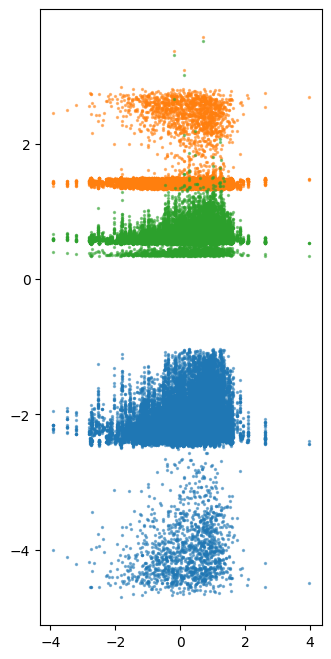

Sequence 0
Current loss:  -0.5425145626068115
Sequence 1
Current loss:  0.04363977909088135
Sequence 2
Current loss:  -0.5170111060142517
Sequence 3
Current loss:  -0.6597249507904053
Sequence 4
Current loss:  -0.017422378063201904
Sequence 5
Current loss:  -0.09627167880535126
Sequence 6
Current loss:  -0.1871582716703415
Sequence 7
Current loss:  0.018771767616271973
Sequence 8
Current loss:  -0.3863350749015808
Sequence 9
Current loss:  -0.11103358864784241
Sequence 10
Current loss:  0.008936524391174316
Sequence 0
Sequence 1
Sequence 2
Sequence 3
Sequence 4
Sequence 5
Sequence 6
Sequence 7
Sequence 8
Sequence 9
Sequence 10
Train losses:  0.27116902980136953 , Validation loss:  0.24104990505498566
torch.Size([26638, 4]) torch.Size([26638, 1])


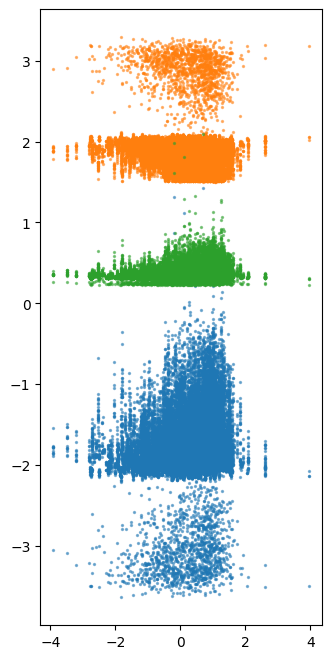

Sequence 0
Current loss:  -0.4740583896636963
Sequence 1
Current loss:  -0.4253614544868469
Sequence 2
Current loss:  -0.4706113040447235
Sequence 3
Current loss:  -0.7115204930305481
Sequence 4
Current loss:  -0.5824532508850098
Sequence 5
Current loss:  -0.3806464672088623
Sequence 6
Current loss:  -0.39030879735946655
Sequence 7
Current loss:  -0.01763930916786194
Sequence 8
Current loss:  -0.600508987903595
Sequence 9
Current loss:  -0.4515014588832855
Sequence 10
Current loss:  -0.3318561315536499
Sequence 0
Sequence 1
Sequence 2
Sequence 3
Sequence 4
Sequence 5
Sequence 6
Sequence 7
Sequence 8
Sequence 9
Sequence 10
Train losses:  0.21660614454072633 , Validation loss:  0.202002457724023
torch.Size([26638, 4]) torch.Size([26638, 1])


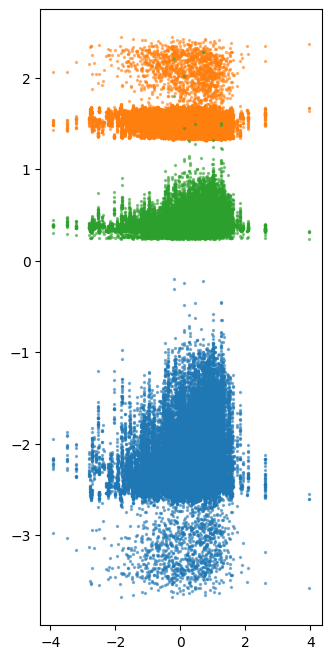

Sequence 0
Current loss:  -0.5717332363128662
Sequence 1
Current loss:  -0.2798314094543457
Sequence 2
Current loss:  -0.372978538274765
Sequence 3
Current loss:  -0.5635589957237244
Sequence 4
Current loss:  -0.2689793109893799
Sequence 5
Current loss:  -0.11603186279535294
Sequence 6
Current loss:  -0.2589188516139984
Sequence 7
Current loss:  -0.08305421471595764
Sequence 8
Current loss:  -0.6424463987350464
Sequence 9
Current loss:  -0.3910231590270996
Sequence 10
Current loss:  -0.3058539032936096
Sequence 0
Sequence 1
Sequence 2
Sequence 3
Sequence 4
Sequence 5
Sequence 6
Sequence 7
Sequence 8
Sequence 9
Sequence 10
Train losses:  0.21087616107917762 , Validation loss:  0.23200651335797898
torch.Size([26638, 4]) torch.Size([26638, 1])


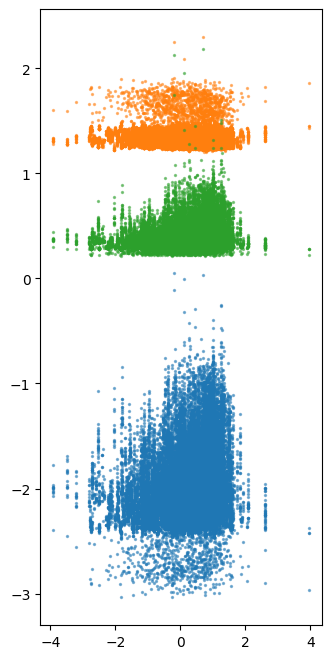

Sequence 0
Current loss:  -0.6602926850318909
Sequence 1
Current loss:  -0.21655160188674927
Sequence 2
Current loss:  -0.3672265112400055
Sequence 3
Current loss:  -0.478949636220932
Sequence 4
Current loss:  -0.3415772318840027
Sequence 5
Current loss:  0.02352173626422882
Sequence 6
Current loss:  -0.10082744807004929
Sequence 7
Current loss:  -0.06456714868545532
Sequence 8
Current loss:  -0.34847986698150635
Sequence 9
Current loss:  -0.050511687994003296
Sequence 10
Current loss:  0.10422424972057343
Sequence 0
Sequence 1
Sequence 2
Sequence 3
Sequence 4
Sequence 5
Sequence 6
Sequence 7
Sequence 8
Sequence 9
Sequence 10
Train losses:  0.2780243206098644 , Validation loss:  0.287749519239958
torch.Size([26638, 4]) torch.Size([26638, 1])


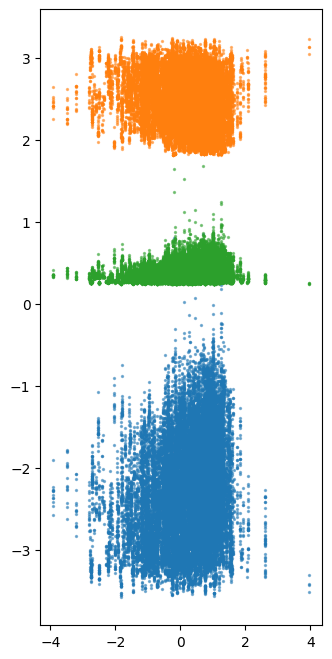

Sequence 0
Current loss:  -0.22406122088432312
Sequence 1
Current loss:  -0.2760072350502014
Sequence 2
Current loss:  -0.21609237790107727
Sequence 3
Current loss:  -0.5348690748214722
Sequence 4
Current loss:  -0.3406033515930176
Sequence 5
Current loss:  -0.2727743685245514
Sequence 6
Current loss:  -0.4505879580974579
Sequence 7
Current loss:  0.2986701726913452
Sequence 8
Current loss:  -0.6117907166481018
Sequence 9
Current loss:  -0.41861557960510254
Sequence 10
Current loss:  -0.2495957314968109
Sequence 0
Sequence 1
Sequence 2
Sequence 3
Sequence 4
Sequence 5
Sequence 6
Sequence 7
Sequence 8
Sequence 9
Sequence 10
Train losses:  0.23524509054905263 , Validation loss:  0.22994650861069765
torch.Size([26638, 4]) torch.Size([26638, 1])


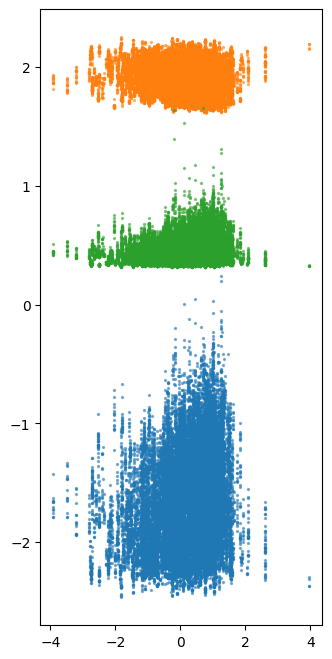

Sequence 0
Current loss:  -0.42272046208381653
Sequence 1
Current loss:  -0.32818564772605896
Sequence 2
Current loss:  -0.2749178409576416
Sequence 3
Current loss:  -0.4192863702774048
Sequence 4
Current loss:  -0.01796784996986389
Sequence 5
Current loss:  -0.10144548118114471
Sequence 6
Current loss:  -0.2754579484462738
Sequence 7
Current loss:  -0.06636543571949005
Sequence 8
Current loss:  -0.7108491659164429
Sequence 9
Current loss:  -0.48508283495903015
Sequence 10
Current loss:  -0.3787161707878113
Sequence 0
Sequence 1
Sequence 2
Sequence 3
Sequence 4
Sequence 5
Sequence 6
Sequence 7
Sequence 8
Sequence 9
Sequence 10
Train losses:  0.22078494847280114 , Validation loss:  0.1951808457990011
torch.Size([26638, 4]) torch.Size([26638, 1])


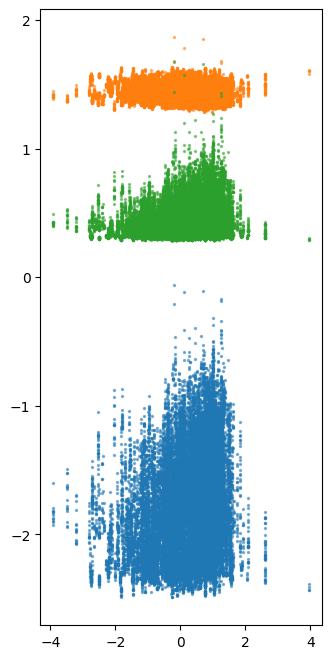

Sequence 0
Current loss:  -0.6112529039382935
Sequence 1
Current loss:  -0.2564265727996826
Sequence 2
Current loss:  -0.41301625967025757
Sequence 3
Current loss:  -0.6031712889671326
Sequence 4
Current loss:  -0.3376372754573822
Sequence 5
Current loss:  -0.08915898203849792
Sequence 6
Current loss:  -0.26417484879493713
Sequence 7
Current loss:  -0.11254873871803284
Sequence 8
Current loss:  -0.6393499374389648
Sequence 9
Current loss:  -0.3515433669090271
Sequence 10
Current loss:  -0.21163269877433777
Sequence 0
Sequence 1
Sequence 2
Sequence 3
Sequence 4
Sequence 5
Sequence 6
Sequence 7
Sequence 8
Sequence 9
Sequence 10
Train losses:  0.2011327741437987 , Validation loss:  0.1927057270687839
torch.Size([26638, 4]) torch.Size([26638, 1])


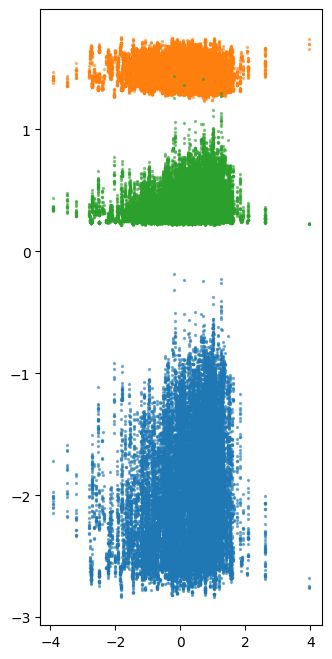

Sequence 0
Current loss:  -0.5970546007156372
Sequence 1
Current loss:  -0.30562981963157654
Sequence 2
Current loss:  -0.4220336079597473
Sequence 3
Current loss:  -0.6109034419059753
Sequence 4
Current loss:  -0.4851352870464325
Sequence 5
Current loss:  -0.06927809119224548
Sequence 6
Current loss:  -0.26284071803092957
Sequence 7
Current loss:  -0.1679147183895111
Sequence 8
Current loss:  -0.6024974584579468
Sequence 9
Current loss:  -0.3269418776035309
Sequence 10
Current loss:  -0.14906993508338928
Sequence 0
Sequence 1
Sequence 2
Sequence 3
Sequence 4
Sequence 5
Sequence 6
Sequence 7
Sequence 8
Sequence 9
Sequence 10
Train losses:  0.21061616863366472 , Validation loss:  0.19390679956605172
torch.Size([26638, 4]) torch.Size([26638, 1])


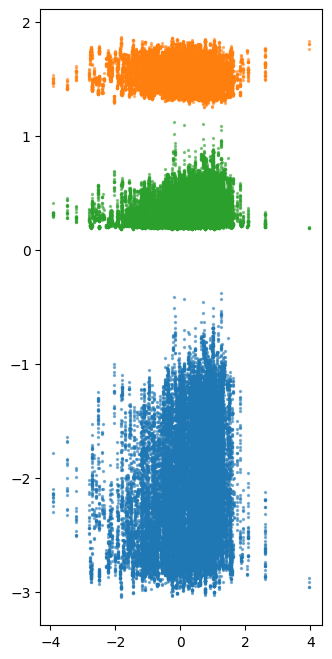

Sequence 0
Current loss:  -0.5372691750526428
Sequence 1
Current loss:  -0.3940744698047638
Sequence 2
Current loss:  -0.4009026288986206
Sequence 3
Current loss:  -0.6154340505599976
Sequence 4
Current loss:  -0.3255557119846344
Sequence 5
Current loss:  -0.09230972826480865
Sequence 6
Current loss:  -0.2981245219707489
Sequence 7
Current loss:  -0.2098272442817688
Sequence 8


KeyboardInterrupt: 

In [113]:
%matplotlib inline


#DEVICE = 'cpu'
loss = TuckeyGandHloss(n_target_channels=1, gmax=3, hmax=3)
nn = nn.to(device=DEVICE)


for i_epoch in range(N_EPOCHS):
    epoch_loss = train_for_one_epoch(nn, loss, optimizer, scheduler,
                                     train_dl, test_dl)
    nn.eval()
    fig = plt.figure(figsize=(8, 8))

    hidden = nn.initHidden(BATCH_SIZE)
    y_train = []
    y_true = []
    
    with torch.no_grad():
        for x, y in train_dl:
            for a in range(x.shape[1]):
                y_train_i, hidden = nn(x[:, a, :], hidden)
                sel = x[:, a, 0] == 0.
                y_train.append(y_train_i[~sel, :].cpu())
                y_true.append(y[~sel, a:a+1].cpu())
            hidden = nn.initHidden(BATCH_SIZE)
    y_train = torch.cat(y_train, axis=0)
    y_true = torch.cat(y_true, axis=0)
    pred_ci95 = loss.predict_ci(y_train)
    print(y_train.shape, y_true.shape)
    #pred_ci99 = loss.predict_ci(y_train, alpha=0.99)
    pred_ci001 = loss.predict_ci(y_train, alpha=0.001)
    ax = fig.add_subplot(1, 2, 1)
    ax.scatter(y_true, pred_ci95[0].cpu(), alpha=0.5, s=2)
    ax.scatter(y_true, pred_ci95[1].cpu(), alpha=0.5, s=2)
    #ax.scatter(train_torch[1].cpu(), pred_ci99[0].cpu(), alpha=0.5, s=2)
    #ax.scatter(train_torch[1].cpu(), pred_ci99[1].cpu(), alpha=0.5, s=2)
    ax.scatter(y_true, pred_ci001[1].cpu(), alpha=0.5, s=2)
    #with torch.no_grad():
    #    pred_ci95 = loss.predict_ci(nn(test_torch[0]))
        #pred_ci99 = loss.predict_ci(nn(test_torch[0]), alpha=0.99)
    #ax = fig.add_subplot(1, 2, 2)
    #ax.scatter(test_torch[1].cpu(), pred_ci95[0].cpu(), alpha=0.1, s=1)
    #ax.scatter(test_torch[1].cpu(), pred_ci95[1].cpu(), alpha=0.1, s=1)
    #ax.scatter(test_torch[1].cpu(), pred_ci99[0].cpu(), alpha=0.1, s=1)
    #ax.scatter(test_torch[1].cpu(), pred_ci99[1].cpu(), alpha=0.1, s=1)
    #plt.show()
    plt.pause(0.1)


Now we look at some predictions on the validation dataset

In [859]:
%matplotlib notebook

def plot_specific_block(block_name: str):
    data_block = test[test.Block_name == block_name].sort_values('Date')
    features_torch, targets_torch = convert_dataset_to_tensor(data_block, feature_names, 'YieldPerHec', 
                                                              True, *mean_std)
    nn.eval()
    with torch.no_grad():
        y_hat = nn(features_torch.to(device=DEVICE))
    ci = loss.predict_ci(y_hat, alpha=0.95)
    ci2 = loss.predict_ci(y_hat, alpha=0.99)
    ci3 = loss.predict_ci(y_hat, alpha=0.25)
    plt.figure()
    plt.plot(data_block.Date, np.exp(ci[0].cpu().numpy()), 'k', label='95% level')
    plt.plot(data_block.Date, np.exp(ci[1].cpu().numpy()), 'k')
    plt.plot(data_block.Date, np.exp(ci2[0].cpu().numpy()), 'r', label='99% level')
    plt.plot(data_block.Date, np.exp(ci2[1].cpu().numpy()), 'r')
    plt.plot(data_block.Date, np.exp(ci3[0].cpu().numpy()), 'b')
    plt.plot(data_block.Date, np.exp(ci3[1].cpu().numpy()), 'b', label='25% level')
    plt.scatter(data_block.Date.values[-1], data_block.YieldPerHec.values[-1], marker='*', c='g', s=50)
    plt.legend()
    plt.ylabel('Yield Per Hec')
    plt.title(f'Block {block_name}')

<IPython.core.display.Javascript object>


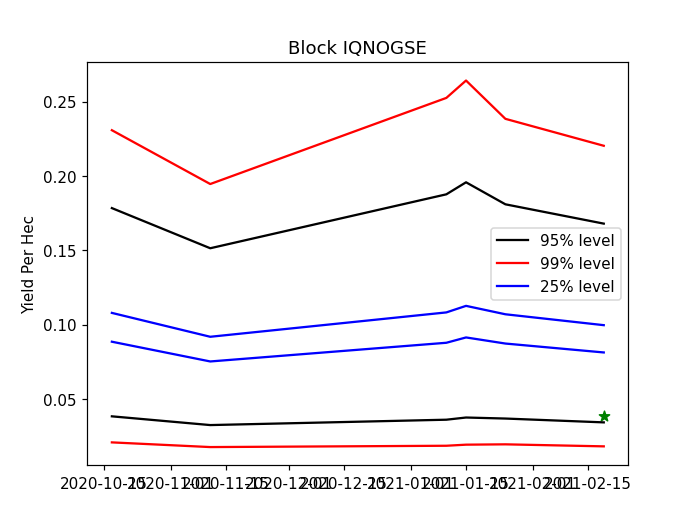

<IPython.core.display.Javascript object>


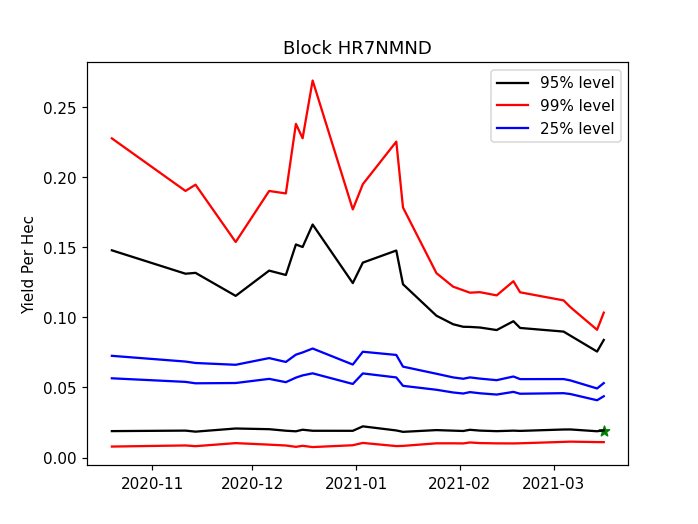

<IPython.core.display.Javascript object>


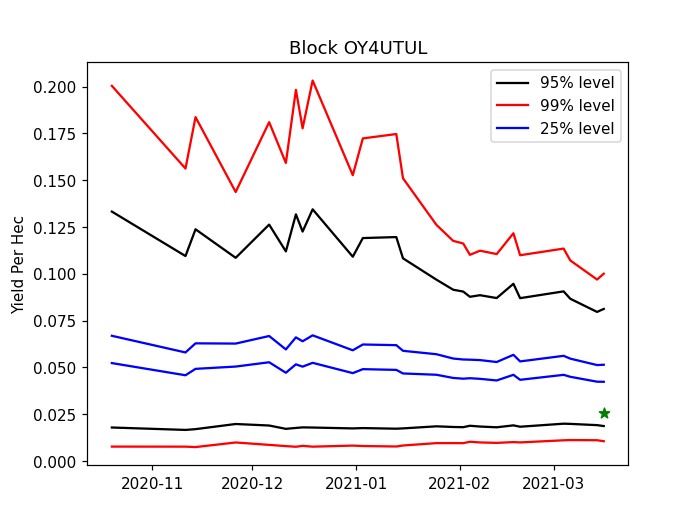

<IPython.core.display.Javascript object>


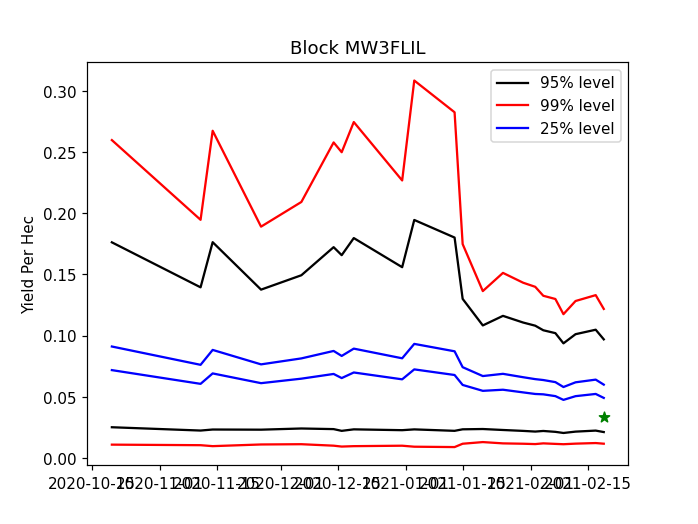

<IPython.core.display.Javascript object>


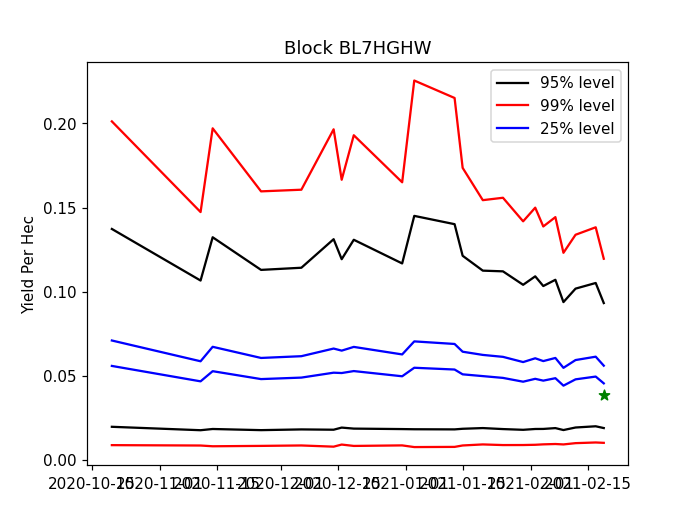

<IPython.core.display.Javascript object>


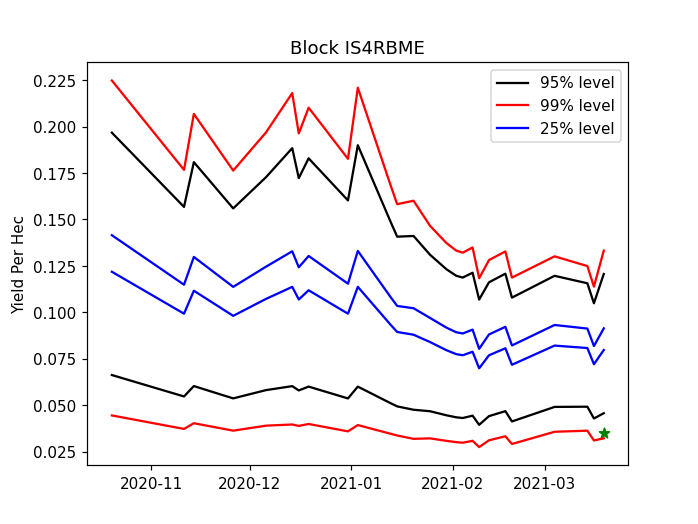

<IPython.core.display.Javascript object>


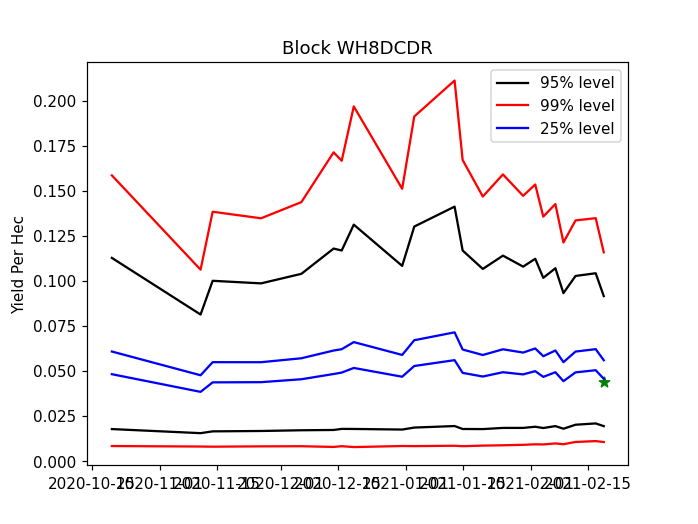

<IPython.core.display.Javascript object>


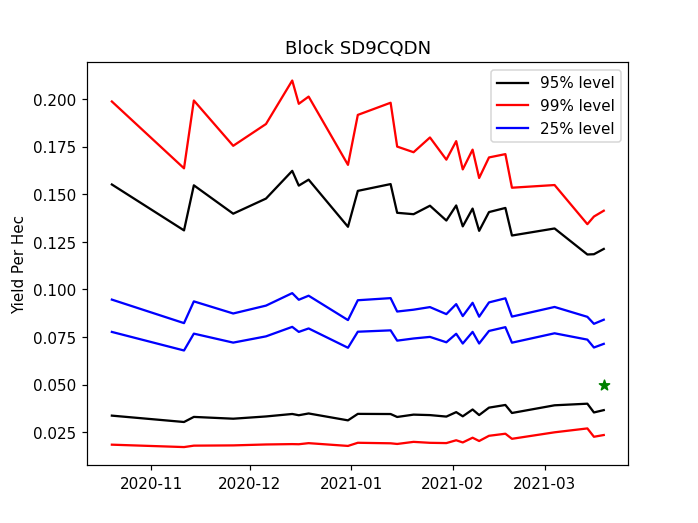

<IPython.core.display.Javascript object>


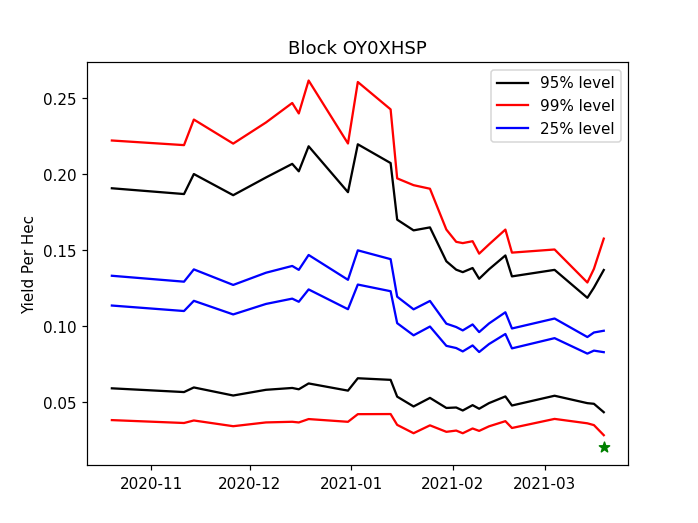

<IPython.core.display.Javascript object>


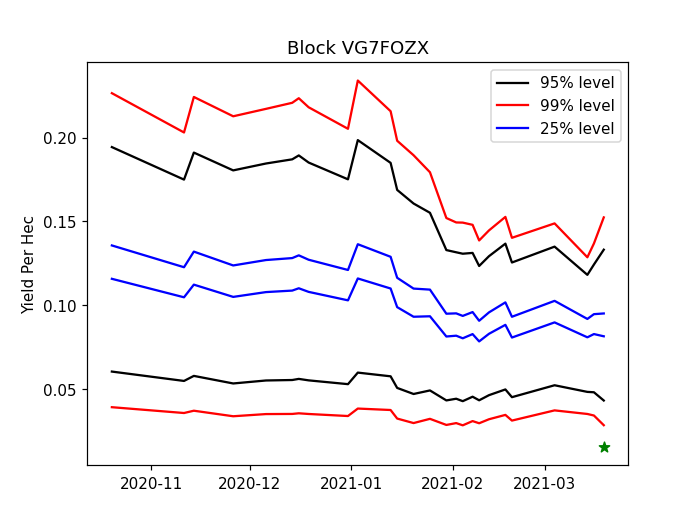

<IPython.core.display.Javascript object>


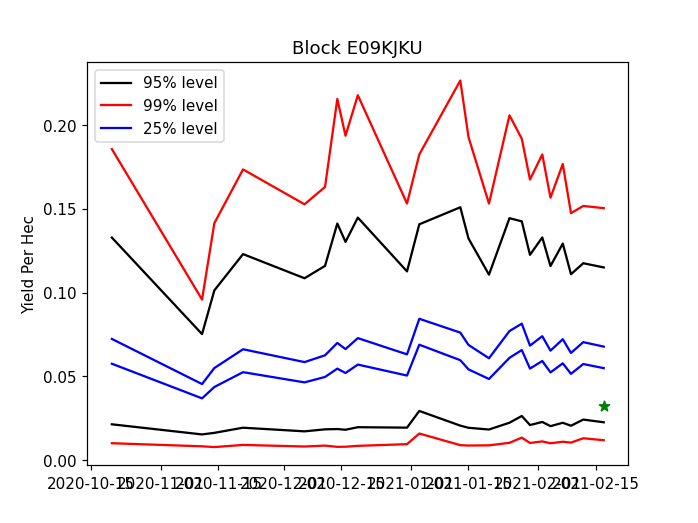

<IPython.core.display.Javascript object>


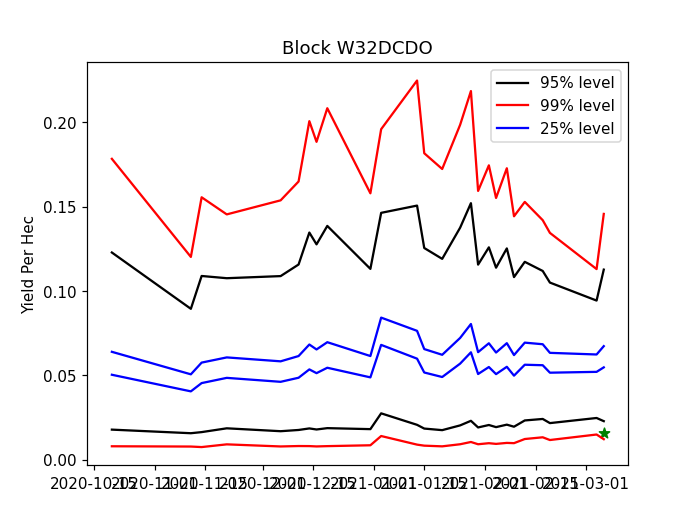

<IPython.core.display.Javascript object>


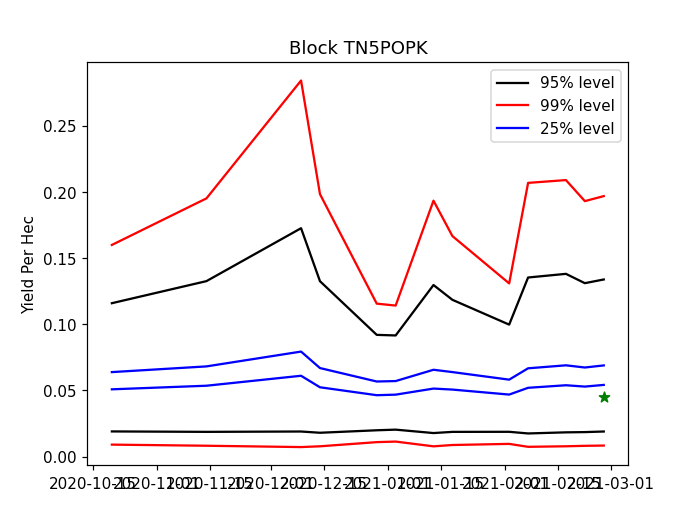

<IPython.core.display.Javascript object>


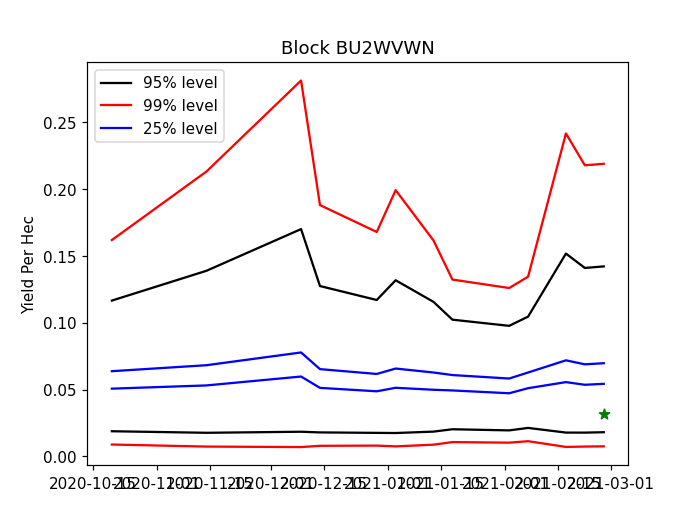

<IPython.core.display.Javascript object>


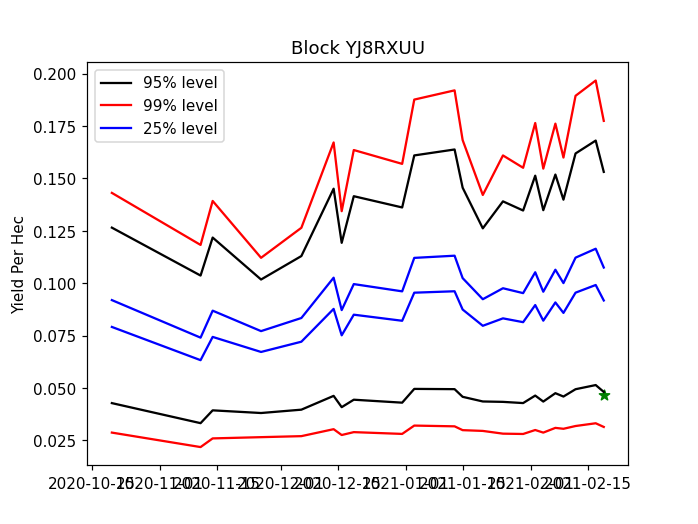

<IPython.core.display.Javascript object>


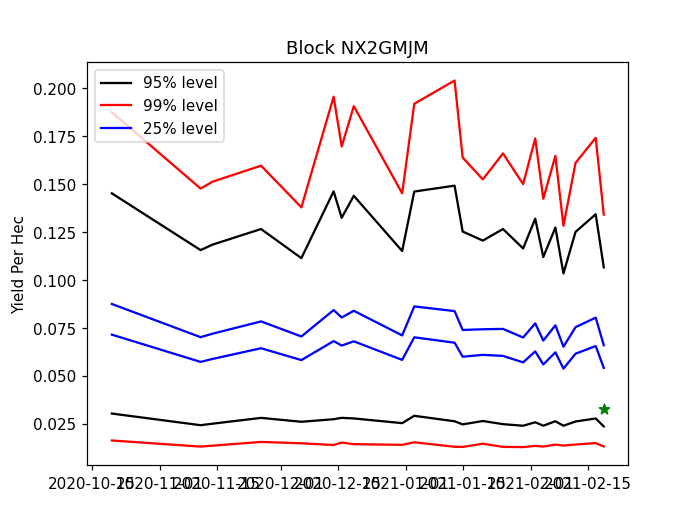

<IPython.core.display.Javascript object>


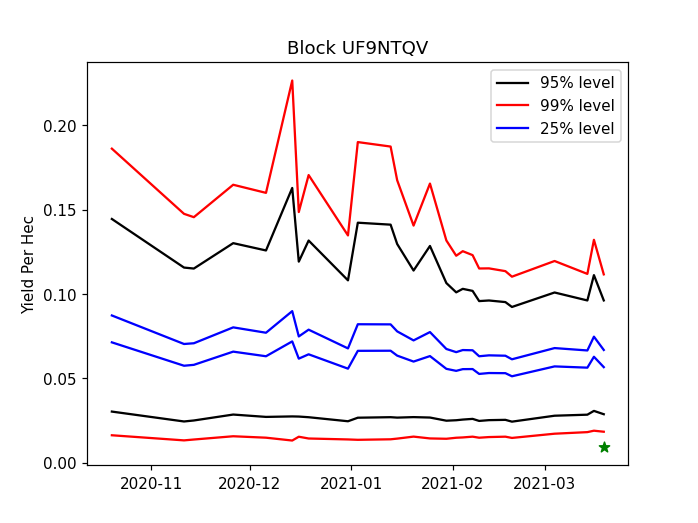

<IPython.core.display.Javascript object>


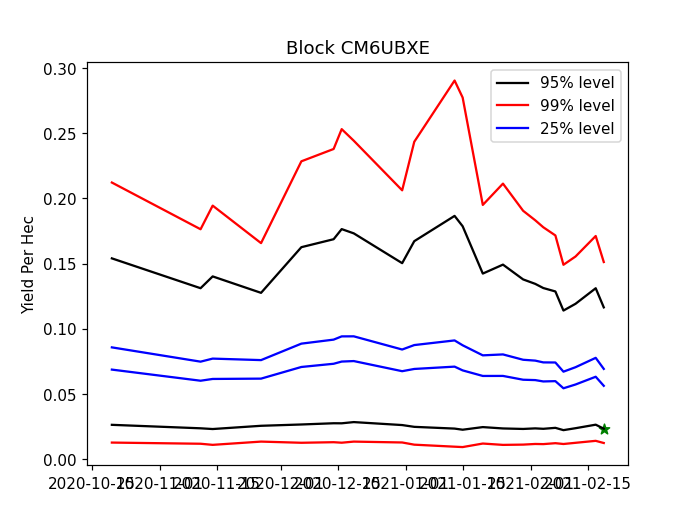

<IPython.core.display.Javascript object>


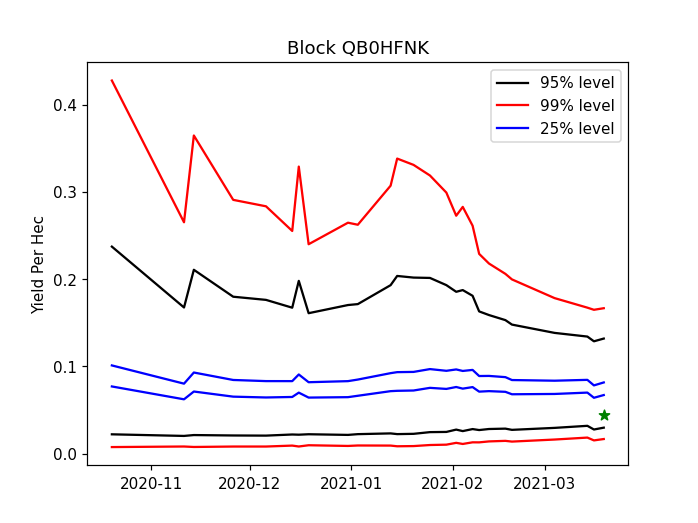

<IPython.core.display.Javascript object>


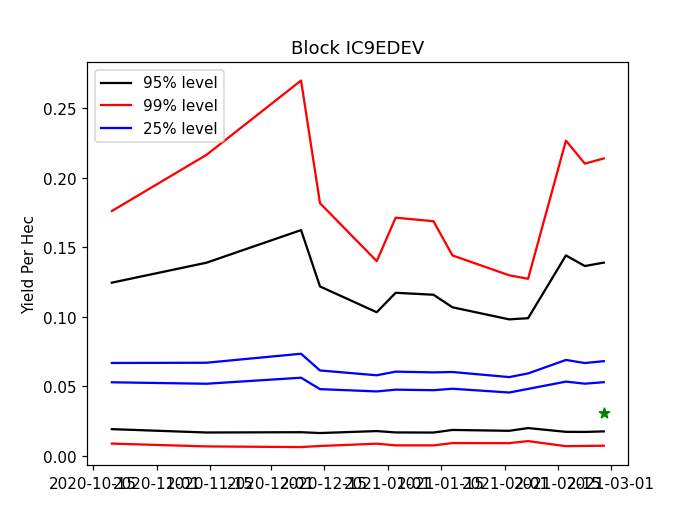

In [204]:
sel = crop_yield_data.Date > datetime.fromisoformat(DATE_SPLIT_TRAIN_TEST)
sel = np.logical_and(sel,  crop_yield_data.YieldPerHec < 0.05)
for block_name in crop_yield_data[sel].Block_name[:20]:
    plot_specific_block(block_name)

In [ ]:
X84HQCZ, Y49FEFS, LV4RQRV, O55XHSI